# Library

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Images

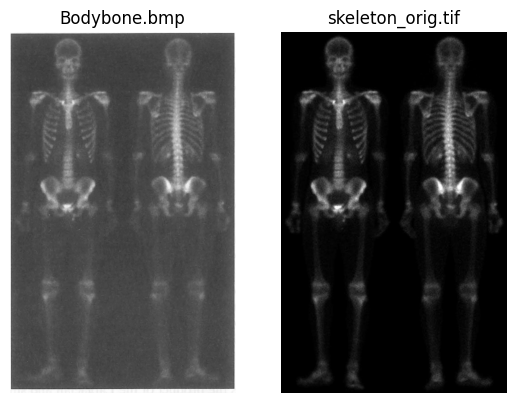

In [2]:
img1 = cv2.imread('Bodybone.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('skeleton_orig.tif', cv2.IMREAD_GRAYSCALE)

plt.subplot(121)
plt.title('Bodybone.bmp')
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('skeleton_orig.tif')
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

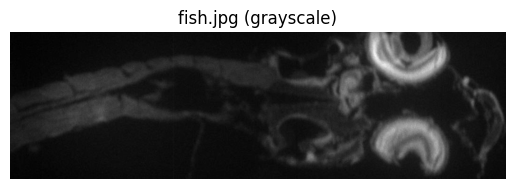

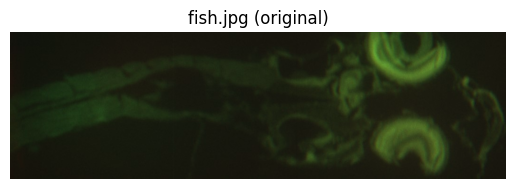

In [3]:
img3 = cv2.imread('fish.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('fish.jpg')

plt.imshow(img3, cmap='gray')
plt.title('fish.jpg (grayscale)')
plt.axis('off')
plt.show()

plt.imshow(img4)
plt.title('fish.jpg (original)')
plt.axis('off')
plt.show()

# Useful Functions

In [4]:
def show_results(img, laplace_result, sharpened_laplace_result, sobel_grad, 
                 smoothed_sobel_grad, product_laplace_sobel, sharpened_image, final_result, 
                 subplot_row, subplot_col, figure_size):
    if len(img.shape) == 3:
        fig, axs = plt.subplots(subplot_row, subplot_col, figsize=figure_size)
        axs[0, 0].imshow(img)
        axs[0, 0].set_title('(A) Original')
        axs[0, 0].axis('off')
        axs[0, 1].imshow(laplace_result)
        axs[0, 1].set_title('(B) Laplacian')
        axs[0, 1].axis('off')
        axs[1, 0].imshow(sharpened_laplace_result)
        axs[1, 0].set_title('(C) Sharpened (A)+(B)')
        axs[1, 0].axis('off')
        axs[1, 1].imshow(sobel_grad)
        axs[1, 1].set_title('(D) Sobel')
        axs[1, 1].axis('off')
        axs[2, 0].imshow(smoothed_sobel_grad)
        axs[2, 0].set_title('(E) Blur')
        axs[2, 0].axis('off')
        axs[2, 1].imshow(product_laplace_sobel)
        axs[2, 1].set_title('(F) Mask')
        axs[2, 1].axis('off')
        axs[3, 0].imshow(sharpened_image)
        axs[3, 0].set_title('(G) Sharpened (A)+(F)')
        axs[3, 0].axis('off')
        axs[3, 1].imshow(final_result)
        axs[3, 1].set_title('(H) Power Transform')
        axs[3, 1].axis('off')
        plt.show()
    else:
        fig, axs = plt.subplots(subplot_row, subplot_col, figsize=figure_size)
        axs[0, 0].imshow(img, cmap='gray')
        axs[0, 0].set_title('(A) Original')
        axs[0, 0].axis('off')
        axs[0, 1].imshow(laplace_result, cmap='gray')
        axs[0, 1].set_title('(B) Laplacian')
        axs[0, 1].axis('off')
        axs[1, 0].imshow(sharpened_laplace_result, cmap='gray')
        axs[1, 0].set_title('(C) Sharpened (A)+(B)')
        axs[1, 0].axis('off')
        axs[1, 1].imshow(sobel_grad, cmap='gray')
        axs[1, 1].set_title('(D) Sobel')
        axs[1, 1].axis('off')
        axs[2, 0].imshow(smoothed_sobel_grad, cmap='gray')
        axs[2, 0].set_title('(E) Blur')
        axs[2, 0].axis('off')
        axs[2, 1].imshow(product_laplace_sobel, cmap='gray')
        axs[2, 1].set_title('(F) Mask')
        axs[2, 1].axis('off')
        axs[3, 0].imshow(sharpened_image, cmap='gray')
        axs[3, 0].set_title('(G) Sharpened (A)+(F)')
        axs[3, 0].axis('off')
        axs[3, 1].imshow(final_result, cmap='gray')
        axs[3, 1].set_title('(H) Power Transform')
        axs[3, 1].axis('off')
        plt.show()

def normalize_image(image):
    # grayscale image
    min_val = np.min(image)
    g_m = image - min_val
    
    g_s = 255 * (g_m / np.max(g_m))
    return g_s

def image_sharpening(image, 
                     laplacian_kernel = np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]]), 
                     sobel_kernel_x = np.array([[-1, -2, -1], [ 0,  0,  0], [ 1,  2,  1]]), 
                     sobel_kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), 
                     box_filter_size = (5, 5), gamma = 0.5):
    # (b): laplacian
    laplacian_img = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel)

    # (c): (a) + (b)
    sharpened_by_laplacian_img = image + normalize_image(laplacian_img)

    # (d): sobel
    grad_x = cv2.filter2D(image, cv2.CV_64F, sobel_kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, sobel_kernel_y)

    sobel_mag = np.absolute(grad_x) + np.absolute(grad_y)

    # (e): blur
    blur_img = cv2.blur(sobel_mag, box_filter_size)

    # (f): (b) * (e)
    mask_img = normalize_image(laplacian_img) * blur_img

    # (g): (a) + (f)
    sharpened_by_mask_img = image + mask_img

    # (h): power transform
    final_img = np.power(sharpened_by_mask_img, gamma)

    return image, laplacian_img, sharpened_by_laplacian_img, sobel_mag, \
           blur_img, mask_img, sharpened_by_mask_img, final_img

## 1. Bone

### Bodybone.bmp

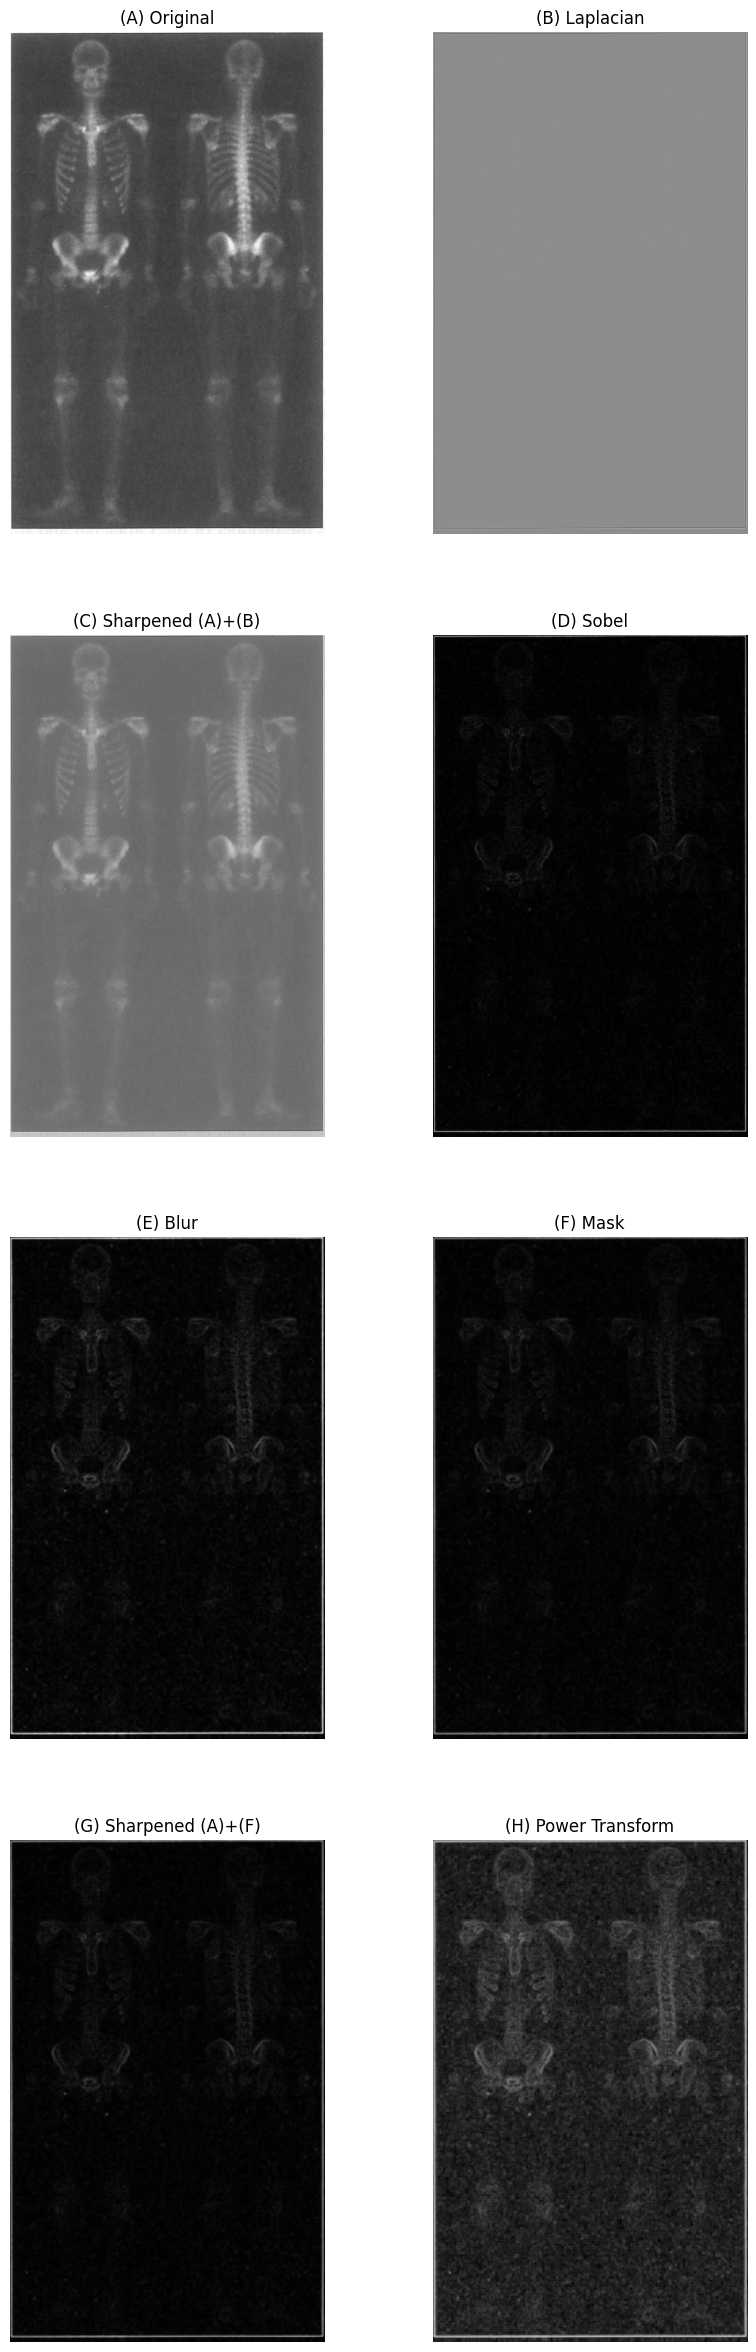

In [5]:
show_results(*image_sharpening(img1), subplot_row=4, subplot_col=2, figure_size=(10, 30))

### skeleton image in the textbook

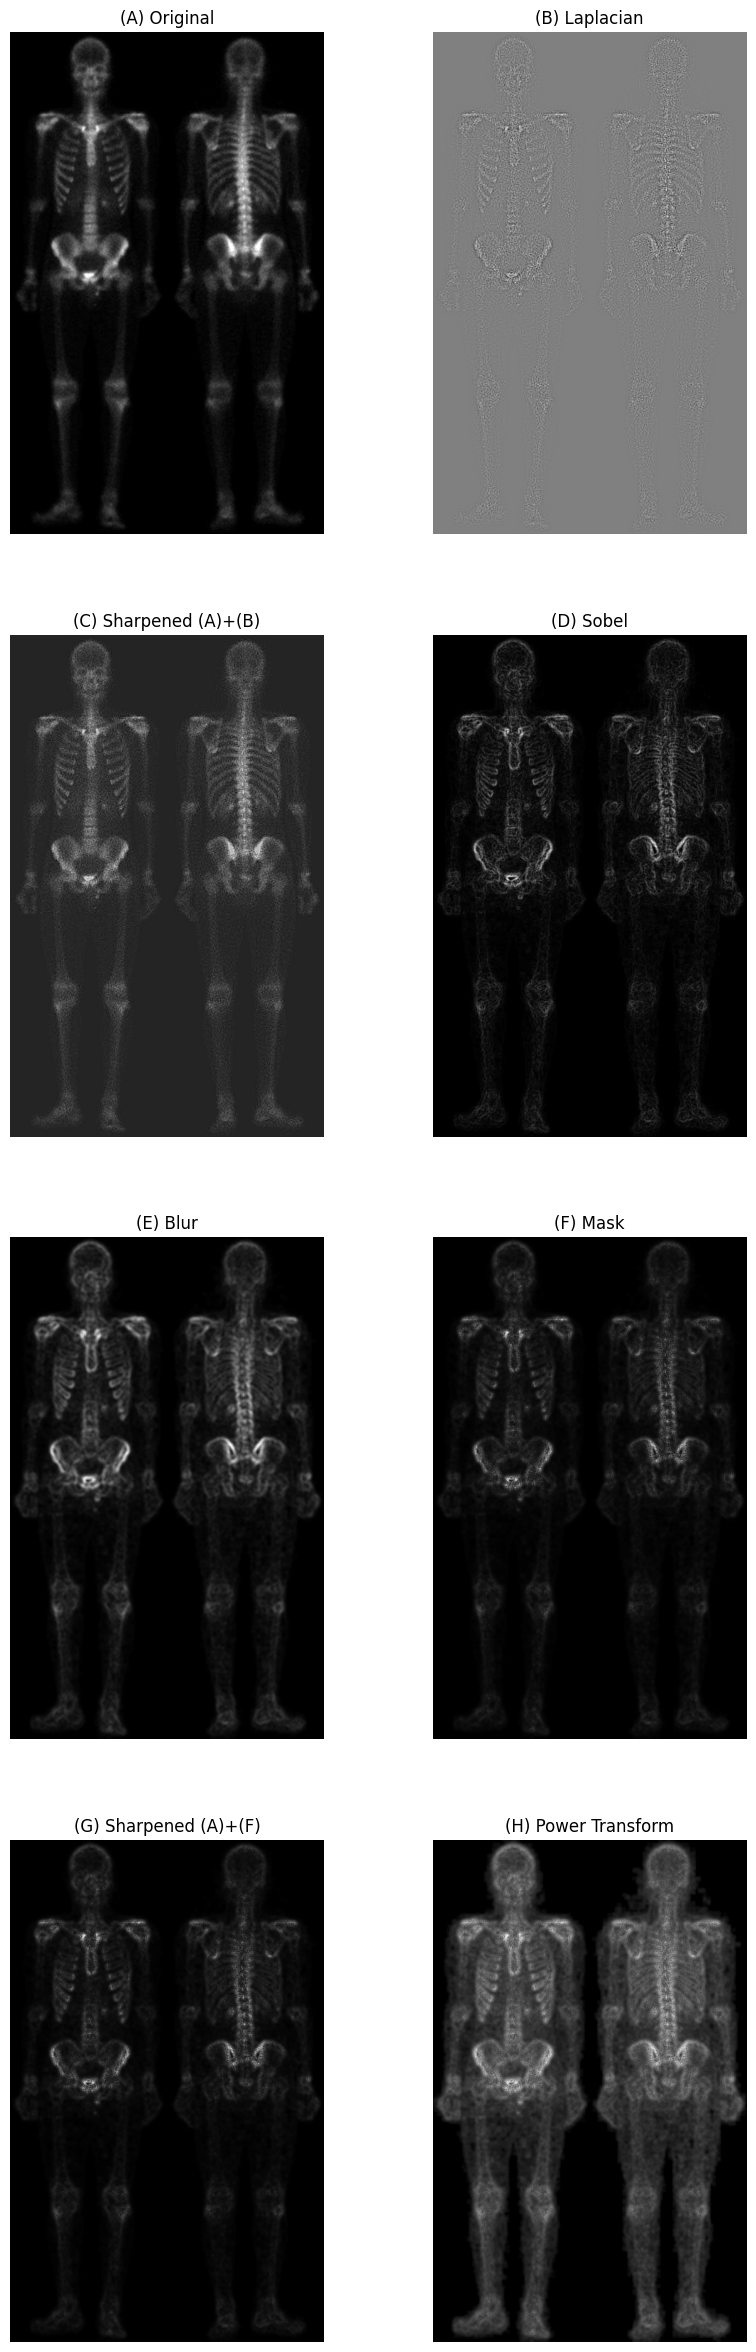

In [6]:
show_results(*image_sharpening(img2), subplot_row=4, subplot_col=2, figure_size=(10, 30))

## 2. Fish

### grayscale version

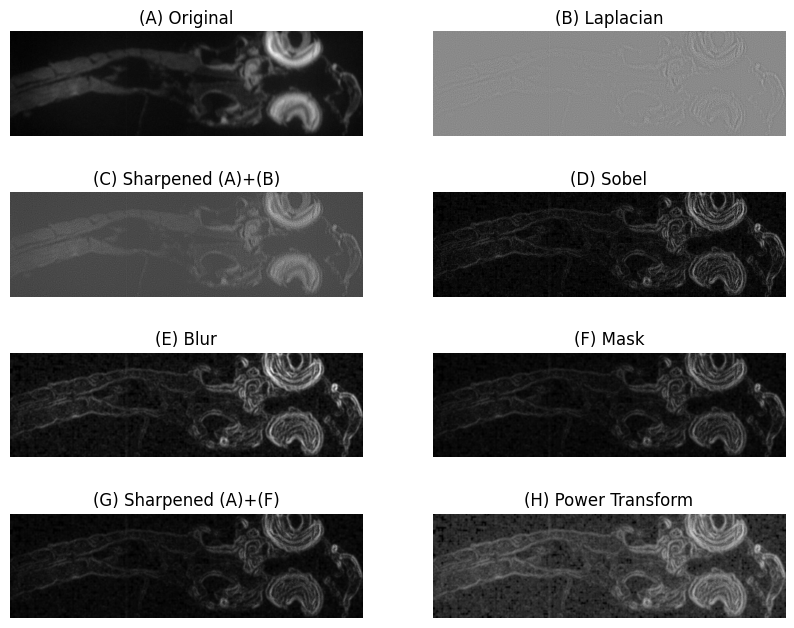

In [7]:
show_results(*image_sharpening(img3), subplot_row=4, subplot_col=2, figure_size=(10, 8))

### color version

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26274509803921564..0.2].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.5535129566378603e-16..0.395921568627451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01408442906574394..0.24399231064974988].


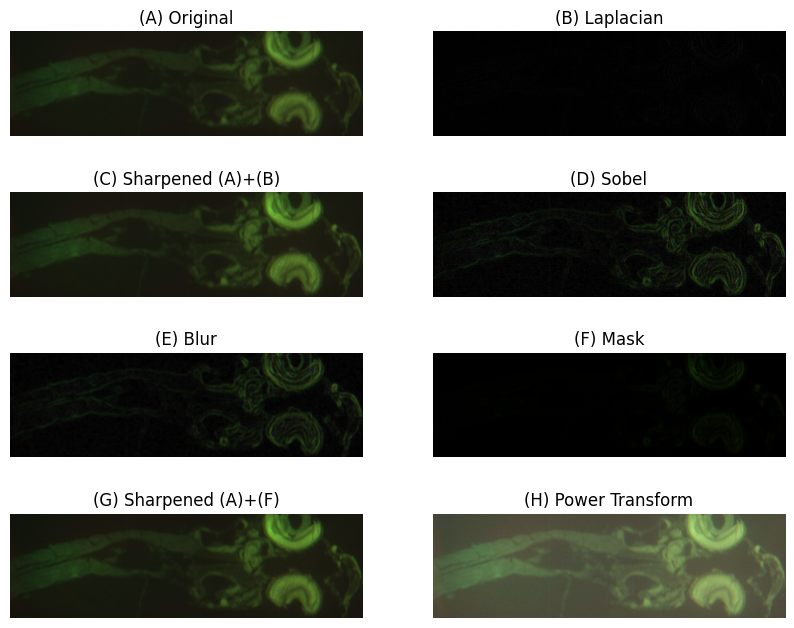

In [9]:
img = img4 / 255.0

# (b)
laplace_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplace_result = np.zeros_like(img)
for i in range(3):
    laplace_result[:, :, i] = cv2.filter2D(img[:, :, i], cv2.CV_64F, laplace_kernel)

# (c)
sharpened_laplace_result = img + laplace_result

# (d)
sobel_kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_grad = np.zeros_like(img)
for i in range(3):
    sobel_grad_x = cv2.filter2D(img[:, :, i], cv2.CV_64F, sobel_kernel_x)
    sobel_grad_y = cv2.filter2D(img[:, :, i], cv2.CV_64F, sobel_kernel_y)
    sobel_grad[:, :, i] = np.abs(sobel_grad_x) + np.abs(sobel_grad_y)

# (e)
smoothed_sobel_grad = np.zeros_like(img)
for i in range(3):
    smoothed_sobel_grad[:, :, i] = cv2.blur(sobel_grad[:, :, i], (5, 5))

# (f)
product_laplace_sobel = sharpened_laplace_result * smoothed_sobel_grad

# (g)
sharpened_image = img + product_laplace_sobel

# (h)
final_result = np.power(sharpened_image, 0.5)

# show result
show_results(img, laplace_result, sharpened_image, sobel_grad, smoothed_sobel_grad, 
             product_laplace_sobel, sharpened_image, final_result, 
             subplot_row=4, subplot_col=2, figure_size=(10, 8))